# Classification Model Comparison: Decision Tree vs Logistic Regression

This Jupyter Notebook implements a comparison of 2 Machine Learning Classification Models: Decision Tree and Logistic Regression

## Approach
* Evaluations of classification performed were performed using 2 sample datasets:
    * sklearn's Iris sample dataset, consisting of 150 sample data points for 3 varieties of iris flowers
    * voice dataset, containing 3168 sample data points of male and female speakers

* Performance was evaluated based upon:
    * Classification model score for the test data
    * Time required to fit the model with training data
    
* For each Classification model, evaluations were performed with tuning of key parameters:
    * Decision Tree: Maximum Tree Depth
    * Logistic Regression: Solver algorithm
    
## Results
* Refer to the Figure and Table of Evaluation results provided below
* For these datasets, the Decision Tree classifier model with no Maximum Tree Depth restriction provided better classifer performance with fast model fit time vs. the Logistic Regression classifier.  The Logistic Regression classifer model using the liblinear solver provided very performance, but required an order of magnitude more time to fit the model.
* The Decision Tree classifier showed significant degradation in performance when Maximum Tree Depth was restricted when using the Iris dataset (4 features, 1 output with 3 classes), but showed almost no degradation in performance with Max Tree Depth restricted when using the Voice dataset (20 features, 1 output with 2 classes).  This classifier required much more fit time with the Voice dataset vs. the Iris dataset.  An examination of decision trees generated for each dataset might provide insight on these observations.
* The Logistic Regression classifier required more fit time than all but the slowest tests with the Decision Tree classifier.  However, within these results, the liblinear solver performed must better for both dataset than the saga and sag solvers.  Investigating the algorithmic differences in these solvers may providing some explanation of both the fit time differences, and for the Voice dataset the performance differences.


| Figure: Classification Model Performance: Decision Tree vs. Logistic Regression |
| :----------: |
| ![Figure: Classification Model Performance: Decision Tree vs. Logistic Regression is Loading...](docs/Figure-Comparison_DecisionTree_vs_LogisticRegression.png "Figure: Classification Model Performance: Decision Tree vs. Logistic Regression") |

| Table: Classification Model Performance: Decision Tree vs. Logistic Regression |
| :----------: |
| ![Table: Classification Model Performance: Decision Tree vs. Logistic Regression is Loading...](docs/Table-Comparison_DecisionTree_vs_LogisticRegression.png "Figure: Classification Model Performance: Decision Tree vs. Logistic Regression") |

# Dependencies

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
import math

from pprint import pprint

# Visualization
import graphviz
import pydotplus

# Machine Learning - Linear Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Linear Models - Classification
from sklearn.linear_model import LogisticRegression   # Linear model for classification

# Machine Learning - Decision Trees and Random Forests - Classification
from sklearn import tree                             # Decision Tree Classifer
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifer

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split # Split data into training and testing samples

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error   # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score             # R-squared (Coefficient of Determination) metric
from sklearn.metrics import confusion_matrix     # Generate a confusion matrix (actual vs. predicted counts)

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification
from sklearn.datasets import load_iris           # Sample multi-class dataset for classification

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Classification Model Comparison: Decision Tree vs Logistic Regression

# Iris Dataset

In [2]:
# Import the Iris sample dataset as a dictionary
iris = load_iris()

print( f"Iris {iris.keys()}" )
print( f"Feature Names: {iris.feature_names}" )
print( f"Target Names: {iris.target_names}" )

Iris dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [3]:
# print(iris.DESCR)

In [4]:
# Assign data and target variables
X = iris.data
y = iris.target
print( X.shape, y.shape )

(150, 4) (150,)


In [5]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Classification Model: Logistic Regression - Iris Dataset

### Logistic Regression: Function to Fit Model, Evaluate Performance - Iris Dataset

In [6]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def eval_logisticregression(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the solver used with this model
    m_solver = str(a_model).split("solver=")[1].split(",")[0].replace("'","").replace('"','')
    
    # Print a separator
    print("*"*80)
    
    # Print the model attributes
    print(a_model)
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
    print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")

    # Generate a confusion matrix of the results for both test and training data
    cm_test = confusion_matrix(y_test, a_model.predict(X_test))
    print("\nConfusion Matrix - Testing Data")
    print(cm_test)

    cm_train = confusion_matrix(y_train, a_model.predict(X_train))
    print("\nConfusion Matrix - Training Data")
    print(cm_train)
        
    a_result = {
        'model': m_name,
        'solver': m_solver,
        'fit_time': m_fit_time.average,
        'n_iter': a_model.n_iter_,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

### Logistic Regression: Iterate Model Parameter - Solver - Iris Dataset

In [7]:
# Initialize list of dictionary of results for summary in a dataframe later
model_results = []

# List of Solvers to use with LogisticRegression model
solver_list = "liblinear", "newton-cg", "lbfgs", "sag", "saga"

# Generate classifer and an associated performance report for each
for s in solver_list:
    # Create a classifier model
    classifier = LogisticRegression(solver=s, n_jobs=1, max_iter=1000)
    
    # Evaluate the classifer performance, create a plot of 
    r = eval_logisticregression(classifier)
    model_results.append( {
        'Dataset': 'Iris',
        'Classifier': r['model'],
        'Solver': r['solver'],
        'Fit Time (ms)': 1000.0*r['fit_time'],
        'Iterations': r['n_iter'],
        'Total Iterations': sum(r['n_iter']),
        'Score-Testing Data': r['score_test'],
        'Score-Training Data': r['score_train'] } )
    print("")

********************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
7.33 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: LogisticRegression
Score - Test Data: 0.9473684210526315, Training Data: 0.9642857142857143
coef_: [[ 0.39678044  1.37054702 -2.14027546 -0.97011187]
 [ 0.21861195 -1.33850758  0.54230923 -1.05697437]
 [-1.44560989 -1.42046542  2.2047351   2.14291609]], intercept_: [ 0.24386405  1.18877543 -1.14322867], n_iter_: [7], 

Confusion Matrix - Testing Data
[[12  0  0]
 [ 0 11  2]
 [ 0  0 13]]

Confusion Matrix - Training Data
[[38  0  0]
 [ 0 33  4]
 [ 0  0 37]]

********************************************************************************
LogisticRegression(C=1.0

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Performance - Model: LogisticRegression
Score - Test Data: 0.9473684210526315, Training Data: 0.9375
coef_: [[-0.18544074  0.98825884 -2.17380448 -0.93607884]
 [-0.72113262 -1.95109464  0.75651058 -0.82367053]
 [ 0.04708532 -0.58172668  2.41546689  1.85970812]], intercept_: [  4.59555653   7.45232933 -13.59249786], n_iter_: [1000  634 1000], 

Confusion Matrix - Testing Data
[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Confusion Matrix - Training Data
[[38  0  0]
 [ 0 31  6]
 [ 0  1 36]]

********************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)
127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: LogisticRegression
Score - Test Data: 0.9736842105263158, Training Data: 0.9375
coef_:

### Logistic Regression: Summary - Iris Dataset

In [8]:
summary_lr_iris_df = pd.DataFrame( model_results,
          columns=['Dataset', 'Classifier', 'Solver', 'Fit Time (ms)', 'Iterations', 'Total Iterations', 'Score-Testing Data', 'Score-Training Data'])

summary_lr_iris_df

,Dataset,Classifier,Solver,Fit Time (ms),Iterations,Total Iterations,Score-Testing Data,Score-Training Data
0,Iris,LogisticRegression,liblinear,7.3300,[7],7,0.947368,0.964286
1,Iris,LogisticRegression,newton-cg,27.3651,"[12, 14, 14]",40,0.947368,0.946429
2,Iris,LogisticRegression,lbfgs,18.6089,"[31, 37, 28]",96,0.947368,0.946429
3,Iris,LogisticRegression,sag,107.0628,"[1000, 634, 1000]",2634,0.947368,0.937500
4,Iris,LogisticRegression,saga,127.0360,"[1000, 1000, 1000]",3000,0.973684,0.937500


In [9]:
summary_lr_iris_df.mean()

Fit Time (ms)            57.480560
Total Iterations       1155.400000
Score-Testing Data        0.952632
Score-Training Data       0.946429
dtype: float64

## Classification Model: Decision Tree - Iris Dataset

### Decision Tree: Function to Fit Model, Evaluate Performance - Iris Dataset

In [10]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def eval_decisiontree(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the maximum tree depth used with this model
    m_max_tree_depth = str(a_model).split("max_depth=")[1].split(",")[0].replace("'","").replace('"','')

    # Print a separator
    print("*"*80)
    
    # Print the model attributes
    print(a_model)
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
#     print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")

    # Generate a confusion matrix of the results for both test and training data
    cm_test = confusion_matrix(y_test, a_model.predict(X_test))
    print("\nConfusion Matrix - Testing Data")
    print(cm_test)

    cm_train = confusion_matrix(y_train, a_model.predict(X_train))
    print("\nConfusion Matrix - Training Data")
    print(cm_train)
    
    # Feature Importances
    print("\nFeature Importances")
    f_impt = [ { 'factor': iris.feature_names[x], 'importance': classifier.feature_importances_[x] } for x in np.arange(len(iris.feature_names)) ]
    f_impt_df = pd.DataFrame(f_impt).sort_values(by='importance', ascending=False)
    print(f_impt_df[['factor', 'importance']])
    
    # Display the Decision Tree using Graphviz
#     dot_data = tree.export_graphviz(
#                             a_model, out_file=None, 
#                             feature_names=iris.feature_names,  
#                             class_names=iris.target_names,  
#                             filled=True, rounded=True, special_characters=True)  

#     graph = graphviz.Source(dot_data)  
#     graph
    
    a_result = {
        'model': m_name,
        'max_depth': m_max_tree_depth,
        'fit_time': m_fit_time.average,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

### Decision Tree: Iterate Models Parameter - Max Tree Depth - Iris Dataset

In [11]:
# Initialize list of dictionary of results for summary in a dataframe later
model_results = []

# List of tree max depth values over which to iterate
max_depth_list = [ None, 16, 8, 4, 2, 1 ]

# Generate classifer and an associated performance report for each
for md in max_depth_list:
    # Create a classifier model
    classifier = tree.DecisionTreeClassifier(max_depth=md)
    
    # Evaluate the classifer performance, create a plot of 
    r = eval_decisiontree(classifier)
    model_results.append( {
        'Dataset': 'Iris',
        'Classifier': r['model'],
        'Max Tree Depth': r['max_depth'],
        'Fit Time (ms)': 1000.0*r['fit_time'],
        'Score-Testing Data': r['score_test'],
        'Score-Training Data': r['score_train'] } )
    print("")

********************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
866 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: DecisionTreeClassifier
Score - Test Data: 0.9736842105263158, Training Data: 1.0

Confusion Matrix - Testing Data
[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Confusion Matrix - Training Data
[[38  0  0]
 [ 0 37  0]
 [ 0  0 37]]

Feature Importances
              factor  importance
2  petal length (cm)    0.899864
3   petal width (cm)    0.056277
0  sepal length (cm)    0.026000
1   sepal width (cm)    0.017859

***************************************************************************

### Decision Tree: Summary - Iris Dataset

In [12]:
summary_dt_iris_df = pd.DataFrame( model_results,
          columns=['Dataset', 'Classifier', 'Max Tree Depth', 'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data'])
summary_dt_iris_df

,Dataset,Classifier,Max Tree Depth,Fit Time (ms),Score-Testing Data,Score-Training Data
0,Iris,DecisionTreeClassifier,None,0.8660,0.973684,1.000000
1,Iris,DecisionTreeClassifier,16,0.6426,0.973684,1.000000
2,Iris,DecisionTreeClassifier,8,0.5023,0.973684,1.000000
3,Iris,DecisionTreeClassifier,4,0.6180,0.973684,0.973214
4,Iris,DecisionTreeClassifier,2,0.4997,0.947368,0.955357
5,Iris,DecisionTreeClassifier,1,0.4788,0.657895,0.669643


In [13]:
summary_dt_iris_df.mean()

Fit Time (ms)          0.601233
Score-Testing Data     0.916667
Score-Training Data    0.933036
dtype: float64

# Voice Dataset

In [14]:
## Import Data and Pre-Process: Voice Dataset
voice = pd.read_csv('resources/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [15]:
# Check datatypes to ensure numerical values are floats vs. objects -- CONFIRMED
# voice.dtypes

In [16]:
# Assign X (data) and y (target)
X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

(3168, 20) (3168,)


In [17]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Classification Model: Logistic Regression - Voice Dataset

### Logistic Regression: Function to Fit Model, Evaluate Performance - Voice Dataset

In [18]:
# Function to fit a model to training data and evaluate classification performance
def gen_classification2(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the solver used with this model
    m_solver = str(a_model).split("solver=")[1].split(",")[0].replace("'","").replace('"','')
    
    # Print a separator
    print("*"*80)
    
    # Print the model attributes
    print(a_model)
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
#     # Flag points that were classified incorrectly
#     y_predicted_test_errors = y_test - y_predicted_test
#     y_predicted_train_errors = y_train - y_predicted_train

    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
    print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")

    # Generate a confusion matrix of the results for both test and training data
    cm_test = confusion_matrix(y_test, a_model.predict(X_test))
    cm_test_df = pd.DataFrame(cm_test, columns = ["Female (Predicted)", "Male (Predicted)"], index = ["Female (Actual)", "Male (Actual)"] )
    print("Confusion Matrix - Testing Data")
    print(cm_test_df)

    print("")

    cm_train = confusion_matrix(y_train, a_model.predict(X_train))
    cm_train_df = pd.DataFrame(cm_train, columns = ["Female (Predicted)", "Male (Predicted)"], index = ["Female (Actual)", "Male (Actual)"] )
    print("Confusion Matrix - Training Data")
    print(cm_train_df)
    
#     # Plot the training and test data, with prediction errors highlighted in different color

#     # Generate a plot
#     plt.scatter(X_test[:,0], X_test[:,1], c=y_predicted_test_errors)
#     plt.scatter(X_train[:,0], X_train[:,1], c=y_predicted_train_errors)
    
#     # plt.legend()

#     plt.title(f"Classification Results - Model: {m_name} / {m_solver}")
#     plt.show()

    a_result = {
        'model': m_name,
        'solver': m_solver,
        'fit_time': m_fit_time.average,
        'n_iter': a_model.n_iter_,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

### Logistic Regression: Iterate Model Parameter - Solver - Voice

In [19]:
# Initialize list of dictionary of results for summary in a dataframe later
model_results = []

# List of Solvers to use with LogisticRegression model
solver_list = "liblinear", "newton-cg", "lbfgs", "sag", "saga"

# Generate classifer and an associated performance report for each
for s in solver_list:
    # Create a classifier model
    classifier = LogisticRegression(solver=s, n_jobs=1, max_iter=1000)
    
    # Evaluate the classifer performance, create a plot of 
    r = gen_classification2(classifier)
    model_results.append( {
        'Dataset': 'Voice',
        'Classifier': r['model'],
        'Solver': r['solver'],
        'Fit Time (ms)': 1000.0*r['fit_time'],
        'Iterations': r['n_iter'],
        'Total Iterations': sum(r['n_iter']),
        'Score-Testing Data': r['score_test'],
        'Score-Training Data': r['score_train'] } )
    print("")

********************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
26.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: LogisticRegression
Score - Test Data: 0.9191919191919192, Training Data: 0.9078282828282829
coef_: [[-5.89619492e-01  1.53399178e+00 -9.19553166e-01 -5.29598693e+00
   2.84644857e+00  8.14243550e+00 -4.13412894e-01  1.21437995e-02
   4.36354157e+00 -4.17828855e-01  7.38816728e-01 -5.89619492e-01
  -1.60598156e+01  1.67748472e-01 -2.35239241e+00 -1.79488747e-01
  -7.99818426e-01 -4.11461517e-01  3.88356909e-01 -3.80961048e-01]], intercept_: [-0.05908685], n_iter_: [24], 
Confusion Matrix - Testing Data
                 Female (Predicted)  Male (Predicted)
Female

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: LogisticRegression
Score - Test Data: 0.5972222222222222, Training Data: 0.6018518518518519
coef_: [[ 0.00885524  0.02782732  0.00895398 -0.03408853  0.04406986  0.07815839
  -0.16523901  0.0065499   0.20737658  0.21335152  0.00727622  0.00885524
  -0.0453945   0.00154254  0.0309698  -0.01467747 -0.02087245 -0.03850983
  -0.01763738  0.0380405 ]], intercept_: [0.16992076], n_iter_: [1000], 
Confusion Matrix - Testing Data
                 Female (Predicted)  Male (Predicted)
Female (Actual)                 313                83
Male (Actual)                   236               160

Confusion Matrix - Training Data
                 Female (Predicted)  Male (Predicted)
Female (Actual)                 903               285
Male (Actual)                   661               527

********************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Logistic Regression: Summary - Voice Dataset

In [20]:
summary_lr_voice_df = pd.DataFrame( model_results,
          columns=['Dataset', 'Classifier', 'Solver', 'Fit Time (ms)', 'Iterations', 'Total Iterations', 'Score-Testing Data', 'Score-Training Data'])
summary_lr_voice_df

,Dataset,Classifier,Solver,Fit Time (ms),Iterations,Total Iterations,Score-Testing Data,Score-Training Data
0,Voice,LogisticRegression,liblinear,26.6153,[24],24,0.919192,0.907828
1,Voice,LogisticRegression,newton-cg,100.4040,[31],31,0.919192,0.907828
2,Voice,LogisticRegression,lbfgs,307.9267,[484],484,0.919192,0.907407
3,Voice,LogisticRegression,sag,1440.4413,[1000],1000,0.597222,0.601852
4,Voice,LogisticRegression,saga,1633.9342,[1000],1000,0.532828,0.539562


In [21]:
summary_lr_voice_df.mean()

Fit Time (ms)          701.864300
Total Iterations       507.800000
Score-Testing Data       0.777525
Score-Training Data      0.772896
dtype: float64

## Classification Model: Decision Tree - Voice Dataset

### Decision Tree: Function to Fit Model, Evaluate Performance - Voice Dataset

In [22]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def eval_decisiontree2(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the maximum tree depth used with this model
    m_max_tree_depth = str(a_model).split("max_depth=")[1].split(",")[0].replace("'","").replace('"','')

    # Print a separator
    print("*"*80)
    
    # Print the model attributes
    print(a_model)
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
#     print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")

#     # Generate a confusion matrix of the results for both test and training data
#     cm_test = confusion_matrix(y_test, a_model.predict(X_test))
#     print("\nConfusion Matrix - Testing Data")
#     print(cm_test)

#     cm_train = confusion_matrix(y_train, a_model.predict(X_train))
#     print("\nConfusion Matrix - Training Data")
#     print(cm_train)
    
    # Generate a confusion matrix of the results for both test and training data
    cm_test = confusion_matrix(y_test, a_model.predict(X_test))
    cm_test_df = pd.DataFrame(cm_test, columns = ["Female (Predicted)", "Male (Predicted)"], index = ["Female (Actual)", "Male (Actual)"] )
    print("Confusion Matrix - Testing Data")
    print(cm_test_df)

    print("")

    cm_train = confusion_matrix(y_train, a_model.predict(X_train))
    cm_train_df = pd.DataFrame(cm_train, columns = ["Female (Predicted)", "Male (Predicted)"], index = ["Female (Actual)", "Male (Actual)"] )
    print("Confusion Matrix - Training Data")
    print(cm_train_df)

    # Feature Importances
    print("\nFeature Importances")
    f_impt = [ { 'factor': iris.feature_names[x], 'importance': classifier.feature_importances_[x] } for x in np.arange(len(iris.feature_names)) ]
    f_impt_df = pd.DataFrame(f_impt).sort_values(by='importance', ascending=False)
    print(f_impt_df[['factor', 'importance']])
    
    # Display the Decision Tree using Graphviz
#     dot_data = tree.export_graphviz(
#                             a_model, out_file=None, 
#                             feature_names=iris.feature_names,  
#                             class_names=iris.target_names,  
#                             filled=True, rounded=True, special_characters=True)  

#     graph = graphviz.Source(dot_data)  
#     graph
    
    a_result = {
        'model': m_name,
        'max_depth': m_max_tree_depth,
        'fit_time': m_fit_time.average,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

### Decision Tree: Iterate Models Parameter - Max Tree Depth - Voice Dataset

In [23]:
# Initialize list of dictionary of results for summary in a dataframe later
model_results = []

# List of tree max depth values over which to iterate
max_depth_list = [ None, 16, 8, 4, 2, 1 ]

# Generate classifer and an associated performance report for each
for md in max_depth_list:
    # Create a classifier model
    classifier = tree.DecisionTreeClassifier(max_depth=md)
    
    # Evaluate the classifer performance, create a plot of 
    r = eval_decisiontree(classifier)
    model_results.append( {
        'Dataset': 'Voice',
        'Classifier': r['model'],
        'Max Tree Depth': r['max_depth'],
        'Fit Time (ms)': 1000.0*r['fit_time'],
        'Score-Testing Data': r['score_test'],
        'Score-Training Data': r['score_train'] } )
    print("")

********************************************************************************
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
35.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: DecisionTreeClassifier
Score - Test Data: 0.9671717171717171, Training Data: 1.0

Confusion Matrix - Testing Data
[[385  11]
 [ 15 381]]

Confusion Matrix - Training Data
[[1188    0]
 [   0 1188]]

Feature Importances
              factor  importance
1   sepal width (cm)    0.004716
2  petal length (cm)    0.001554
0  sepal length (cm)    0.000000
3   petal width (cm)    0.000000

********************************************************************************
DecisionTreeClass

### Decision Tree: Summary - Voice Dataset

In [24]:
summary_dt_voice_df = pd.DataFrame( model_results,
          columns=['Dataset', 'Classifier', 'Max Tree Depth', 'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data'])
summary_dt_voice_df

,Dataset,Classifier,Max Tree Depth,Fit Time (ms),Score-Testing Data,Score-Training Data
0,Voice,DecisionTreeClassifier,None,35.7424,0.967172,1.000000
1,Voice,DecisionTreeClassifier,16,34.3959,0.976010,1.000000
2,Voice,DecisionTreeClassifier,8,35.6804,0.974747,0.998316
3,Voice,DecisionTreeClassifier,4,23.9562,0.976010,0.981061
4,Voice,DecisionTreeClassifier,2,13.3180,0.963384,0.962542
5,Voice,DecisionTreeClassifier,1,7.8620,0.955808,0.953283


In [25]:
summary_dt_voice_df.mean()

Fit Time (ms)          25.159150
Score-Testing Data      0.968855
Score-Training Data     0.982534
dtype: float64

## Overall Results

In [26]:
# Get the summary results for each set of classification runs
dt_iris_subset_df = summary_dt_iris_df[
    ['Dataset', 'Classifier', 'Max Tree Depth',
     'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data']]

lr_iris_subset_df = summary_lr_iris_df[
    ['Dataset', 'Classifier', 'Solver', 'Iterations', 'Total Iterations',
     'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data']]

dt_voice_subset_df = summary_dt_voice_df[
    ['Dataset', 'Classifier', 'Max Tree Depth',
     'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data']]

lr_voice_subset_df = summary_lr_voice_df[
    ['Dataset', 'Classifier', 'Solver', 'Iterations', 'Total Iterations',
     'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data']]

In [27]:
# Combine the results into an overall summary dataframe
overall_df = pd.concat([dt_iris_subset_df, lr_iris_subset_df,
                        dt_voice_subset_df, lr_voice_subset_df], sort=True).reset_index(drop=True)
overall_df = overall_df[['Dataset', 'Classifier',
                         'Solver', 'Iterations', 'Total Iterations',
                         'Max Tree Depth', 
                         'Fit Time (ms)', 'Score-Testing Data', 'Score-Training Data' ]]
overall_df

,Dataset,Classifier,Solver,Iterations,Total Iterations,Max Tree Depth,Fit Time (ms),Score-Testing Data,Score-Training Data
0,Iris,DecisionTreeClassifier,NaN,NaN,NaN,None,0.8660,0.973684,1.000000
1,Iris,DecisionTreeClassifier,NaN,NaN,NaN,16,0.6426,0.973684,1.000000
2,Iris,DecisionTreeClassifier,NaN,NaN,NaN,8,0.5023,0.973684,1.000000
3,Iris,DecisionTreeClassifier,NaN,NaN,NaN,4,0.6180,0.973684,0.973214
4,Iris,DecisionTreeClassifier,NaN,NaN,NaN,2,0.4997,0.947368,0.955357
5,Iris,DecisionTreeClassifier,NaN,NaN,NaN,1,0.4788,0.657895,0.669643
6,Iris,LogisticRegression,liblinear,[7],7.0,NaN,7.3300,0.947368,0.964286
7,Iris,LogisticRegression,newton-cg,"[12, 14, 14]",40.0,NaN,27.3651,0.947368,0.946429
8,Iris,LogisticRegression,lbfgs,"[31, 37, 28]",96.0,NaN,18.6089,0.947368,0.946429
9,Iris,LogisticRegression,sag,"[1000, 634, 1000]",2634.0,NaN,107.0628,0.947368,0.937500


In [28]:
# Function: Gather data needed for plots for each Dataset and Classifier
def get_plot_data(a_x_col, a_y_col):
    
    # Sort the dataframe in ascending order by the column a_x_col
    sorted_df = overall_df.sort_values(by=a_x_col, ascending=True)
    
    plt_list = []
    plt_i = 0
    for ds in sorted_df['Dataset'].unique():
        for cls in sorted_df['Classifier'].unique():
            
            

            x_val = list(sorted_df[a_x_col]
                             [ (sorted_df['Dataset']==ds) & (sorted_df['Classifier']==cls) ])

            y_val = list(overall_df[a_y_col]
                             [ (sorted_df['Dataset']==ds) & (sorted_df['Classifier']==cls) ])
            
            solver_val = list(overall_df['Solver']
                             [ (sorted_df['Dataset']==ds) & (sorted_df['Classifier']==cls) 
                                & sorted_df['Solver'].notnull() ])

            tot_iter_val = list(overall_df['Total Iterations']
                             [ (sorted_df['Dataset']==ds) & (sorted_df['Classifier']==cls) 
                                & sorted_df['Total Iterations'].notnull() ])

            max_depth_val = list(overall_df['Max Tree Depth']
                             [ (sorted_df['Dataset']==ds) & (sorted_df['Classifier']==cls) 
                                & sorted_df['Max Tree Depth'].notnull() ])

            plt_info = {
                'title': f"Dataset {ds}/Classifer {cls}",
                'x_column': a_x_col,
                'x': x_val,
                'y_column': a_y_col,
                'y': y_val,
                'solver': solver_val,
                'tot_iter': tot_iter_val,
                'max_depth': max_depth_val
            }

            plt_list.append(plt_info)
            plt_i += 1
    return plt_list
        
# Columns to plot
x_column = 'Fit Time (ms)'
y_column = 'Score-Testing Data'

p_info_list = get_plot_data(x_column, y_column)
# pprint(p_info_list)

In [29]:
# Function: Setup the axes and plots
def create_plot(a_ax, a_plt_info):
    
    # Set the title
    a_ax.set_title(a_plt_info['title'])
    
    # Set the y-axis range to (0,1), normal range for model scores
    a_ax.set_ylabel(a_plt_info['y_column'])
    a_ax.set_ylim(0,1.1)
    
    # Set the x-axis minimum to 0 and maximum to the max Fit Time overall
    a_ax.set_xlabel(a_plt_info['x_column'])
    a_ax.set_xlim(0, 1.1*max(a_plt_info['x']))
    
    # Plot the data
    a_ax.scatter( a_plt_info['x'], a_plt_info['y'], c="b" )
    
    # Plot a linear trend line
    z = np.polyfit(a_plt_info['x'], a_plt_info['y'], 1)
    p = np.poly1d(z)
    a_ax.plot( a_plt_info['x'], p(a_plt_info['x']), c="r", linestyle='-', linewidth=0.5 )
    
    # Add grid lines
    a_ax.grid(c='k', linestyle='-', linewidth=0.2)
    
    # Add text to the first datapoint
    first_point_text = f"({a_plt_info['x'][0]:0.2f}, {a_plt_info['y'][0]:0.2f})"
    
    try:
        first_point_text += f"\nSolver: {a_plt_info['solver'][0]}"
        first_point_text += f"\nTotal Iterations: {a_plt_info['tot_iter'][0]}"

    except:
        pass
    
    try:
        first_point_text += f"\nMax Depth: {a_plt_info['max_depth'][0]}"
    except:
        pass
    
    a_ax.text( 0.85*a_plt_info['x'][0], 0.85*a_plt_info['y'][0], first_point_text )
    
    # Add text to the last datapoint
    last_point_text = f"({a_plt_info['x'][-1]:0.2f}, {a_plt_info['y'][-1]:0.2f})"
    
    try:
        last_point_text += f"\nSolver: {a_plt_info['solver'][-1]}"
        last_point_text += f"\nTotal Iterations: {a_plt_info['tot_iter'][-1]}"

    except:
        pass
    
    try:
        last_point_text += f"\nMax Depth: {a_plt_info['max_depth'][-1]}"
    except:
        pass
        
    a_ax.text( 0.85*a_plt_info['x'][-1], 0.85*a_plt_info['y'][-1], last_point_text )

        

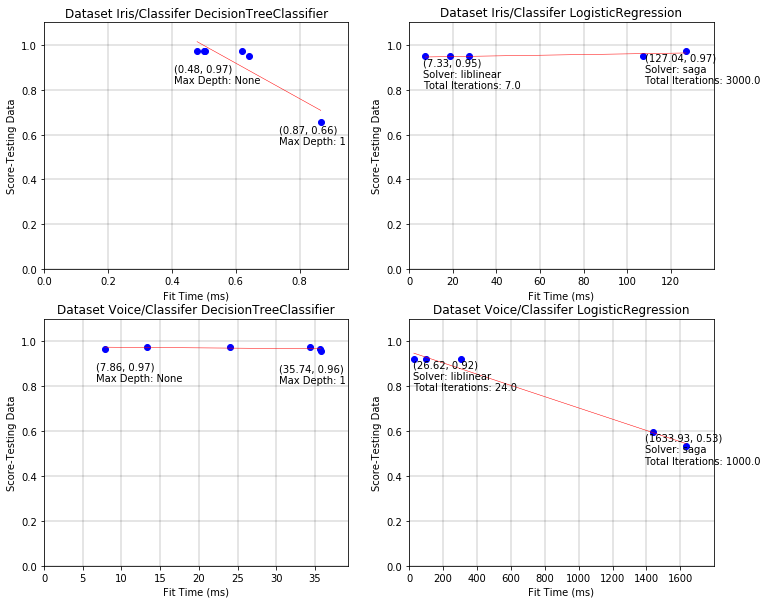

In [30]:
# Plot Classification Performance results
fig1 = plt.figure(figsize=(12,10))
ax_list = []
p_i = 0

for p_info in p_info_list:
    ax_list.append( fig1.add_subplot(2, math.ceil(len(p_info_list)/2), p_i+1) )
    create_plot(ax_list[p_i], p_info)
    p_i += 1
    
    
# Save the image - use it for Summary of Analysis at the top of the notebook
plt.savefig('docs/Comparison_DecisionTree_vs_LogisticRegression.png', bbox_inches='tight')